In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('IRIS.csv')

## Univariate analysis of target variable

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<AxesSubplot:xlabel='species'>

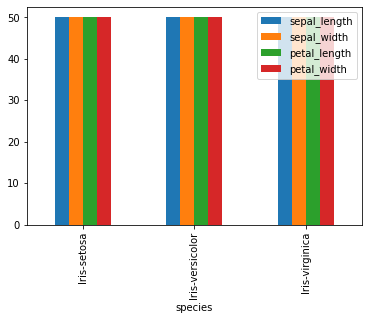

In [9]:
data.groupby('species').count().plot(kind = "bar")

## Analysis of feature variables

### Renaming labels

In [10]:
data['species'] = data['species'].map({'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica':3})

In [11]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,2.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


In [12]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


### Determining outliers

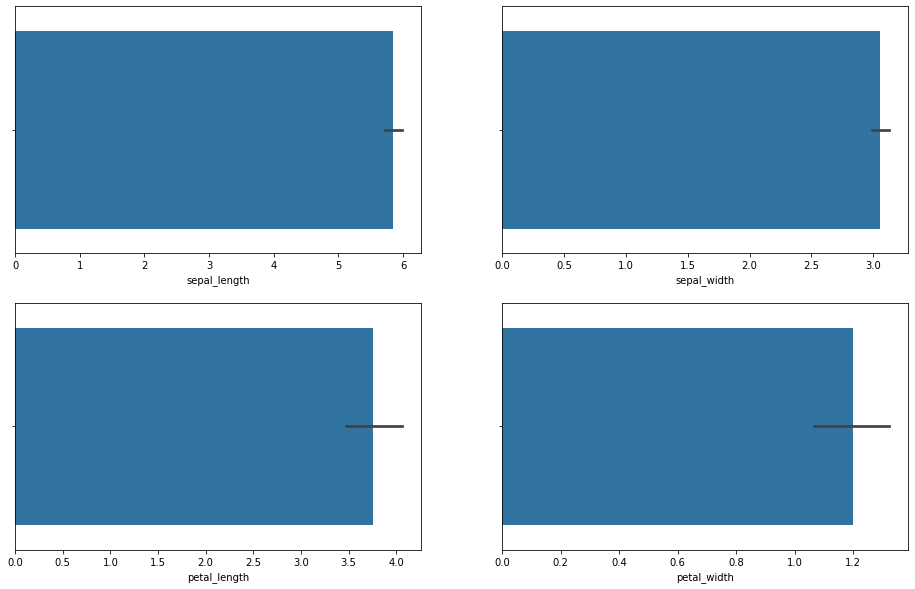

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(16, 10))
sns.barplot(data, x=data['sepal_length'], ax=ax[0, 0])
sns.barplot(data, x=data['sepal_width'], ax=ax[0, 1])
sns.barplot(data, x=data['petal_length'], ax=ax[1, 0])
sns.barplot(data, x=data['petal_width'], ax=ax[1, 1])
plt.show()

### Removing Outliers

In [16]:
feature_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for col in feature_columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3-q1
    upper_limit = q3+1.5*iqr
    lower_limit = q1-1.5*iqr
    data = data.loc[(data[col]>lower_limit) & (data[col]<upper_limit)]
    

### Plotting distribution

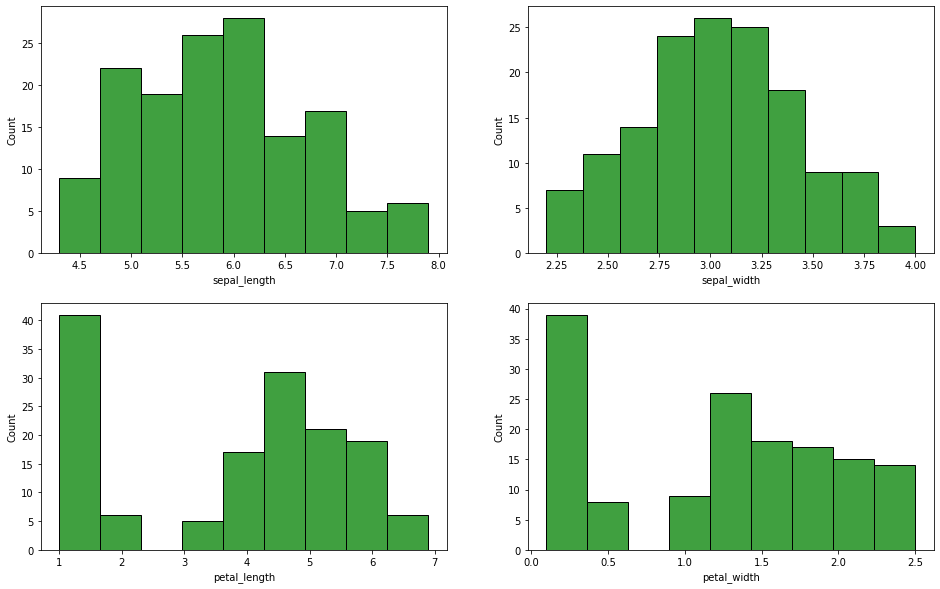

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(16, 10))
sns.histplot(data, x=data['sepal_length'], ax=ax[0, 0], color="green")
sns.histplot(data, x=data['sepal_width'], ax=ax[0, 1], color="green")
sns.histplot(data, x=data['petal_length'], ax=ax[1, 0], color="green")
sns.histplot(data, x=data['petal_width'], ax=ax[1, 1], color="green")
plt.show()

### Plotting correlation

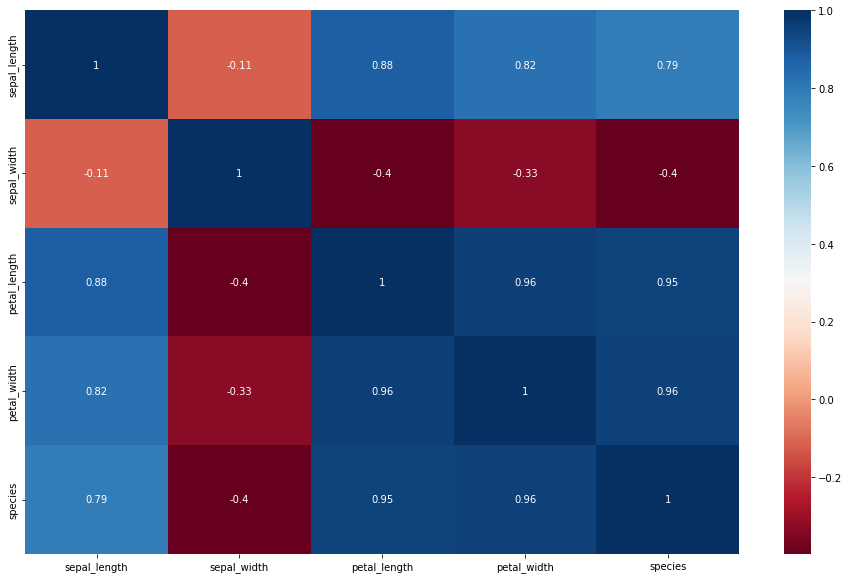

In [18]:
fig, ax = plt.subplots(figsize= (16, 10))
sns.heatmap(data.corr(), annot = True, cmap = "RdBu")
plt.show()

In [19]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

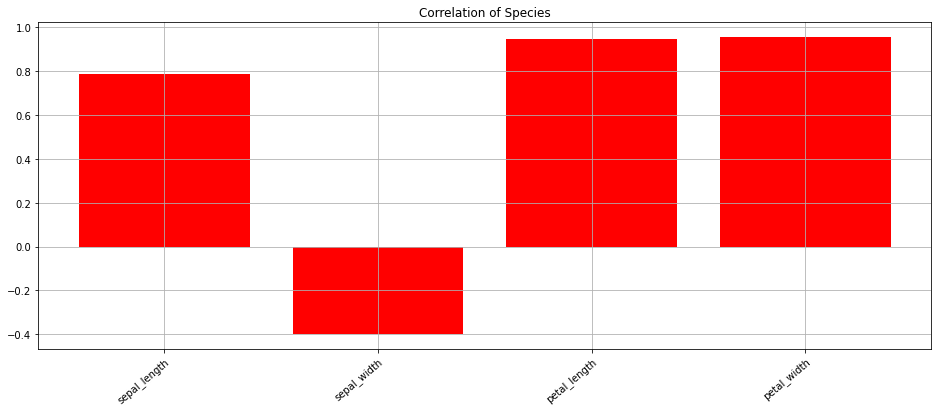

In [20]:
fig, ax = plt.subplots(figsize= (16, 6))
plt.bar(features, data.corr()['species'].drop("species"), color="red")
plt.grid()
plt.xticks(rotation="40", ha="right", rotation_mode = "anchor")
plt.title("Correlation of Species")
plt.show()

## Splitting dataset

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X= data.drop(columns="species")
Y= data['species']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [24]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((116, 4), (30, 4), (116,), (30,))

## Scaling feature variables

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [27]:
x_train[:5]

array([[ 1.99183162, -0.05796034,  1.57530723,  1.15098785],
       [-1.74801612,  0.44006922, -1.47700568, -1.41400429],
       [ 2.34244235,  1.93415788,  1.46012561,  1.01598827],
       [ 0.70625896, -0.05796034,  0.94180833,  0.74598909],
       [-1.04679467,  1.18711355, -1.47700568, -1.2790047 ]])

In [28]:
x_test[:5]

array([[ 0.47251848, -0.30697511,  0.99939914,  0.74598909],
       [-0.22870297,  1.93415788, -1.24664244, -1.2790047 ],
       [-0.22870297, -0.30697511,  0.1931278 ,  0.07099116],
       [ 0.47251848,  0.689084  ,  0.48108185,  0.47598992],
       [ 0.93999945,  0.689084  ,  1.05698995,  1.15098785]])

## Predictive analysis

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [30]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred)*100)

Accuracy Score:  93.33333333333333


In [31]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred)*100)

Accuracy Score:  96.66666666666667


In [32]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred)*100)

Accuracy Score:  96.66666666666667
